In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df_orig = pd.read_csv('data.csv/data.csv')
df = df_orig.copy()

In [3]:
df.head(3)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723


In [4]:
df_1 = df.drop(columns=['id'],axis=1)

<AxesSubplot:>

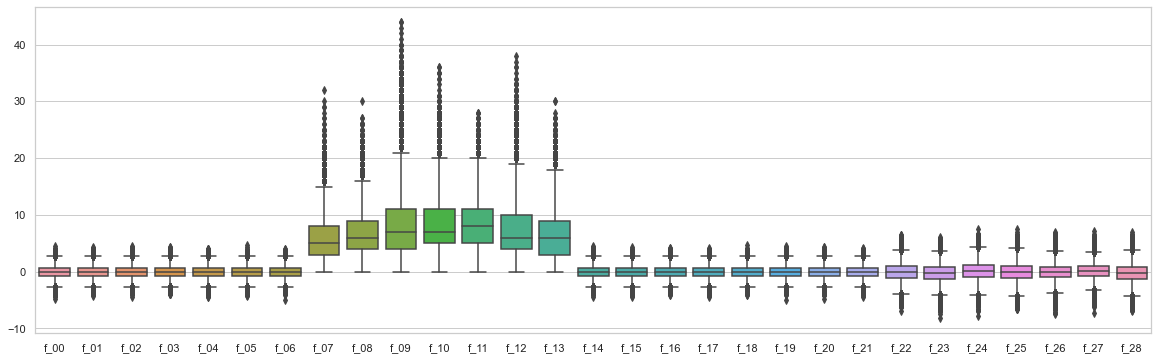

In [5]:
sns.set(style='whitegrid')
plt.subplots(figsize=(20,6))
sns.boxplot(data=df_1)

In [6]:
from scipy import stats

In [7]:
cols_select = []
alpha = 0.05

for col in df:
    _, p_value = stats.shapiro(df[col])
    if (p_value <= alpha): 
        cols_select.append(col)   

In [8]:
cols_select

['id',
 'f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28']

In [9]:
from sklearn.preprocessing import PowerTransformer

In [10]:
df_train = df.copy()
df_train = PowerTransformer().fit_transform(df_train)

In [11]:
df_train=pd.DataFrame(df_train,columns=df.columns)

In [12]:
df_train.head(2)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-2.196170,-0.389230,-0.917652,0.647948,0.590717,-0.824836,0.734685,2.259470,-0.977987,1.383372,...,-0.472922,-0.753925,-0.763110,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-2.195469,-0.688368,-0.458647,0.653182,0.995359,-1.644030,0.864898,-0.085604,-0.977987,-0.875405,...,-0.423594,-0.088164,-1.777545,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652


In [13]:
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

In [14]:
model = BayesianGaussianMixture(n_components=7, covariance_type='full', random_state=1)
predicted_clusters = model.fit_predict(df_train)

In [15]:
df_train['predicted']=predicted_clusters

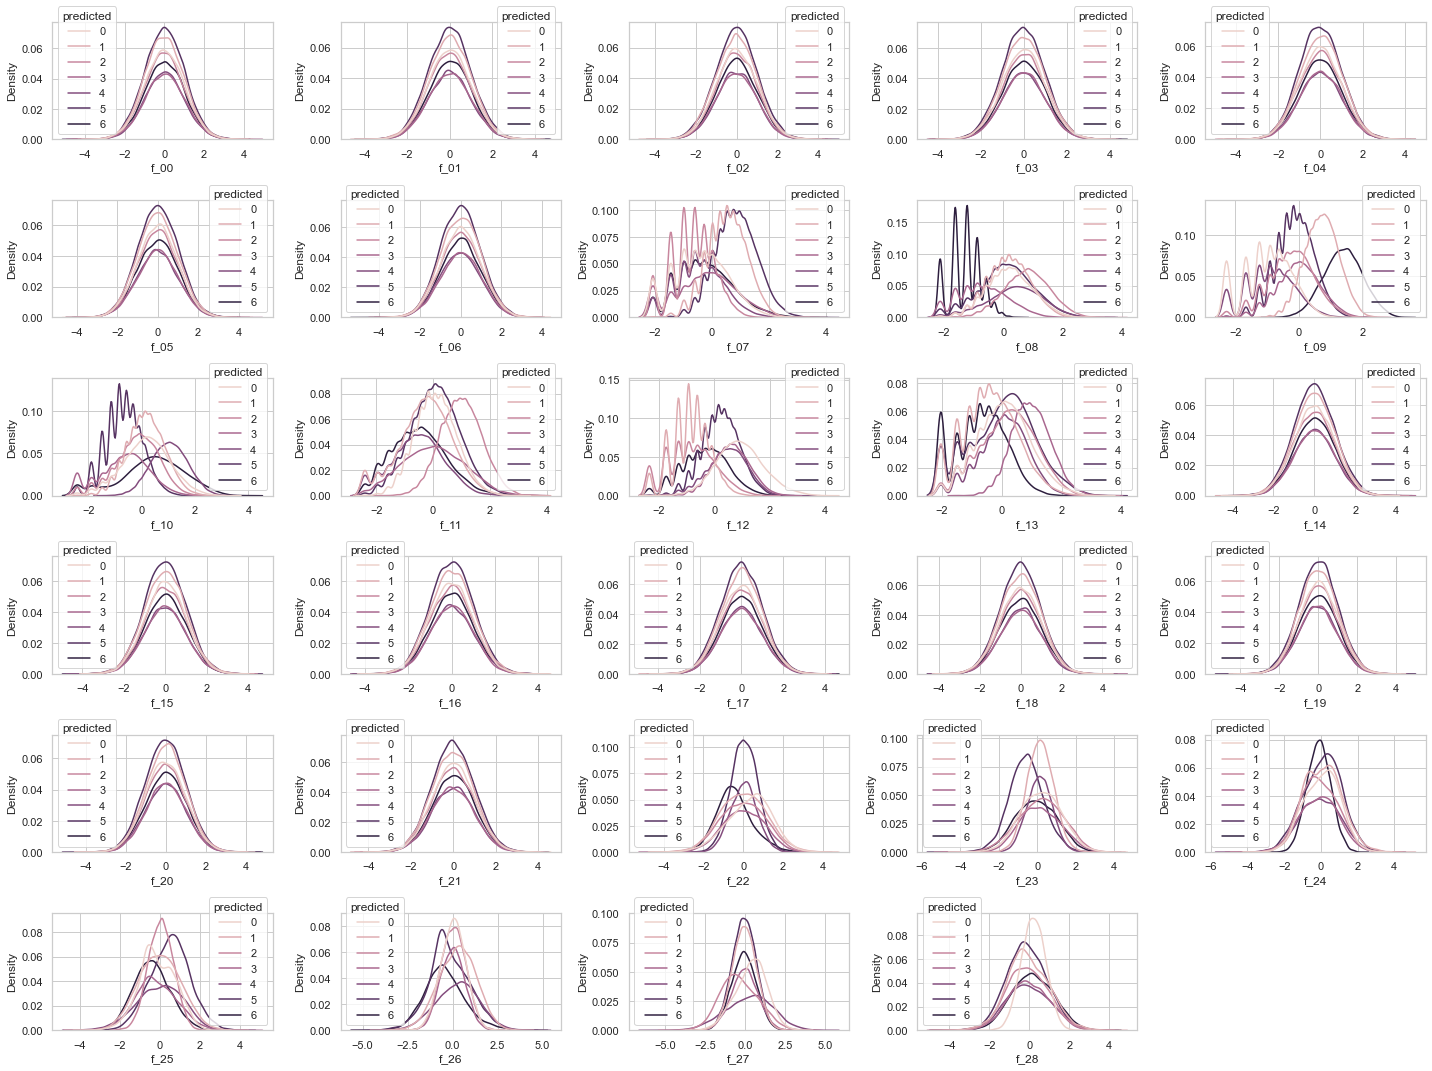

In [16]:
fig=plt.figure(figsize=(20,15))
          
for i,f in enumerate(df_1.columns):
    plt.subplot(6,5,i+1)
    sns.kdeplot(data=df_train,x=f,hue='predicted')
    plt.xlabel(f)

plt.tight_layout()    
plt.show()

In [17]:
df_train.head(2)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,predicted
0,-2.196170,-0.389230,-0.917652,0.647948,0.590717,-0.824836,0.734685,2.259470,-0.977987,1.383372,...,-0.753925,-0.763110,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234,2
1,-2.195469,-0.688368,-0.458647,0.653182,0.995359,-1.644030,0.864898,-0.085604,-0.977987,-0.875405,...,-0.088164,-1.777545,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652,3


In [18]:
df_cols_train = df_train[cols_select]

In [19]:
df_cols_train = df_cols_train.drop(columns=['id'],axis=1)

In [20]:
df_cols_train.head(2)

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652


In [24]:
from sklego.mixture import BayesianGMMClassifier

In [25]:
X=df_cols_train
y=df_train['predicted']

# model = BayesianGaussianMixture(n_components=7, covariance_type='full', random_state=1)
model = BayesianGMMClassifier(n_components=7, random_state=1, tol=1e-3, covariance_type='full', max_iter=400, n_init=4, init_params='kmeans')
model.fit(X, y)
clusters_pred =  model.predict(X)

In [26]:
df_cols_train['predicted'] =clusters_pred

In [27]:
df_submission = pd.read_csv('sample_submission.csv')
df_submission.head(2)

,Id,Predicted
0,0,0
1,1,0


In [28]:
df.head(3)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723


In [29]:
df['predicted'] =clusters_pred

In [30]:
submission=df.loc[:,['id','predicted']] 

In [31]:
submission.head()

,id,predicted
0,0,2
1,1,3
2,2,1
3,3,6
4,4,5


In [32]:
submission.to_csv("submission.csv", index=False)